In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from playsound import playsound

In [2]:
#FUNCTIONS

#DTFT FUNCTION - accepts omega, signal and array where the signal is defined
def DTFT(w,sig,n):
    z = np.zeros(len(w),dtype=complex)
    for m in range(len(w)):                    #for all the omegas in given range
        dtft = 0
        for i in range (len(sig)):             #for all the points of signal
            dtft = dtft + (sig[i]*(np.cos(w[m]*n[i])-(np.sin(w[m]*n[i]))*1j))      #analysis equation
        z[m] = dtft
    return z                                   #returns an array which contains dtft of a specific W as element

#Convolution function - accepts input signal and impulse response as the parameters
def Convolution(x,h):
    k = len(x)                                         #variable k stores length of input signal
    l = len(h)                                         #variable l stores length of impulse response
    p = k+l
    Y = np.zeros(p-1,dtype=complex)                    #length of output signal of convolution is k+l-1
    for i in range(0,p-1):                             #Filling in all the array values of output signal
        for j in range(0,k):                           #iteration over length of impulse response signal
            if i-j < l and i-j >= 0  :                 #impulse response is defined only for index greater than or equal to 0 and less than signal length
                Y[i]=Y[i]+x[j]*h[i-j]                  #Convolution sum
    return Y                                           #returns output signal i.e convolution of x and h 

#Function to plot magnitude,phase and group delay plots of a function
def plot_spectrums(y,w,a):
    mag = []
    phase = []
    grd = []
    for i in range(len(w)):              #Calculating magnitude and phase
        mag.append(abs(y[i]))
        phase.append(np.angle(y[i]))
    
    for i in range(len(w)-1):            #Calculating group delay
        ele = -(phase[i+1]-phase[i-1])/(2*(w[i+1]-w[i]))
        grd.append(ele)
    grd.append(ele)
    if(a==1):                                   #To plot all the three plots (magnitude,phase and group delay)
        plt.subplot(3,1,1)
        plt.title("Magnitude spectrum")
        plt.xlabel("ω")
        plt.ylabel("magnitude")
        plt.plot(w,mag)
        plt.show()
        plt.subplot(3,1,2)
        plt.title("Phase spectrum")
        plt.xlabel("ω")
        plt.ylabel("phase(radians)")
        plt.plot(w,phase)
        plt.show()
        plt.subplot(3,1,3)
        plt.title("Group Delay")
        plt.xlabel("ω")
        plt.ylabel("group delay")
        plt.plot(w,grd)
        plt.ylim(0,3)
        plt.show()
    else:                                      #To plot only two plots(magnitude and phase)
        plt.subplot(2,1,1)
        plt.title("Magnitude spectrum")
        plt.xlabel("ω")
        plt.ylabel("magnitude")
        plt.plot(w,mag)
        plt.show()
        plt.subplot(2,1,2)
        plt.title("Phase spectrum")
        plt.xlabel("ω")
        plt.ylabel("phase(radians)")
        plt.plot(w,phase)
        plt.show()

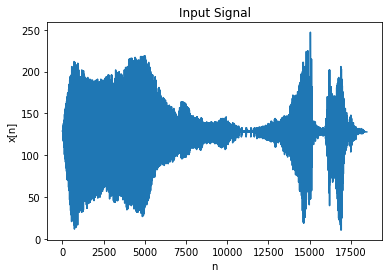

WE CAN OBSERVE THE DISTORTED CRY SIGNAL (after applying the given FIR filter) BELOW


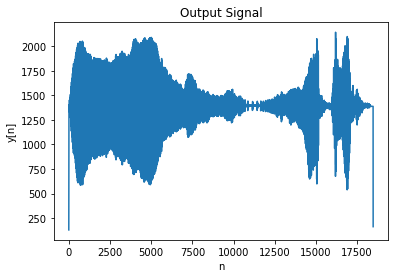

In [3]:
#Y[Z] = X(Z)H(Z), by writing LCCDE and applying inverse z transform with x[n]=δ[n] we obtain y[n]=h[n]
#Hence on calculation we otain the following h[n]
k = 5
h = np.zeros(k,dtype=complex)
for i in range(0,k):
    if i==0:
        h[i] = 1
    elif i==1:
        h[i] = -0.9*np.exp(1j*-1*0.6*np.pi)-0.9*np.exp(1j*0.6*np.pi)-1.25*np.exp(1j*-1*0.8*np.pi)-1.25*np.exp(1j*0.8*np.pi)
    elif i==2:
        h[i] = 1.125*np.exp(1j*-1*1.4*np.pi)+1.125*np.exp(1j*1.4*np.pi)+1.125*np.exp(1j*-1*0.2*np.pi)+1.125*np.exp(1j*0.2*np.pi)+2.3725
    elif i==3:
        h[i] = -1.40625*np.exp(1j*-1*0.6*np.pi)-1.40625*np.exp(1j*0.6*np.pi)-1.0125*np.exp(1j*-1*0.8*np.pi)-1.0125*np.exp(1j*0.8*np.pi)
    elif i==4:
        h[i] = 1.265625
    else:
        h[i] = 0 

#Obtaining the input signal - cry
W = wave.open('cry.wav','rb')
lst= W.readframes(W.getnframes())
x=[]
for i in range(W.getnframes()):
    frame = lst[i]
    x.append(frame)
    
n = np.linspace(0,len(x)-1,len(x))                    #array which stores the values where input signal is defined

   
y = Convolution(x,h)                                  #applying the given filter to cry signal
t = np.linspace(0,len(y)-1,len(y))                    #array which stores the values where output signal is defined

plt.title("Input Signal")                             #Plots input signal
plt.xlabel("n")  
plt.ylabel("x[n]")  
plt.plot(n,x)
plt.show()
print("WE CAN OBSERVE THE DISTORTED CRY SIGNAL (after applying the given FIR filter) BELOW")
plt.title("Output Signal")                            #Plots output signal
plt.xlabel("n")  
plt.ylabel("y[n]")  
plt.plot(t,np.real(y))
plt.show()



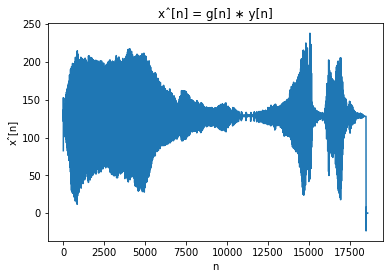

INPUT SIGNAL SPECTRUM - X(e^(jw))


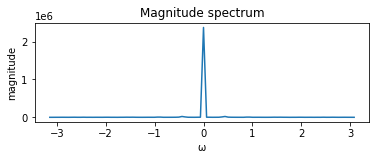

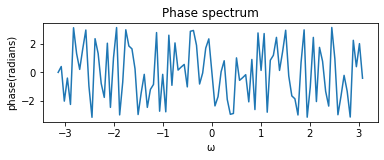

OUTPUT SPECTRUM OF INVERSE SYSTEM - Xˆ(e^(jw))


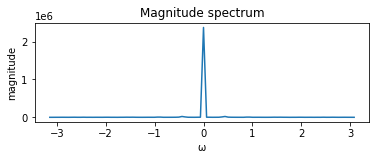

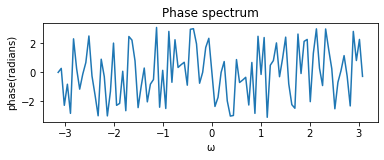

From the above spectrums of X(e^(jw)) and Xˆ(e^(jw)) we can observe that the inverse system is very effective in undoing the effect of the distorting system as they are almost similar 


In [4]:
N = 100                                                #Number of values of w
w = np.linspace(-1*np.pi,1*np.pi,N,endpoint = False)   #omega in the range -π ≤ ω < π

k = 100                                                #Defining a finite number of values for g[n]
g = np.zeros(k,dtype=complex)

#G[Z] = 1/H_min(Z), by substituting H_min(Z),simplifying using partial fractions and then applying inverse z - tranform we obtain g[n]
#Hence on calculation we otain the following g[n]
A = 0.64/((1-((0.9*np.exp(-1j*0.6*np.pi))/(0.9*np.exp(1j*0.6*np.pi))))*(1-((0.8*np.exp(1j*0.8*np.pi))/(0.9*np.exp(1j*0.6*np.pi))))*(1-((0.8*np.exp(-1j*0.8*np.pi))/(0.9*np.exp(1j*0.6*np.pi)))))
B = 0.64/((1-((0.9*np.exp(1j*0.6*np.pi))/(0.9*np.exp(-1j*0.6*np.pi))))*(1-((0.8*np.exp(1j*0.8*np.pi))/(0.9*np.exp(-1j*0.6*np.pi))))*(1-((0.8*np.exp(-1j*0.8*np.pi))/(0.9*np.exp(-1j*0.6*np.pi)))))
C = 0.64/((1-((0.9*np.exp(1j*0.6*np.pi))/(0.8*np.exp(1j*0.8*np.pi))))*(1-((0.9*np.exp(-1j*0.6*np.pi))/(0.8*np.exp(1j*0.8*np.pi))))*(1-((0.8*np.exp(-1j*0.8*np.pi))/(0.8*np.exp(1j*0.8*np.pi)))))
D = 0.64/((1-((0.9*np.exp(1j*0.6*np.pi))/(0.8*np.exp(-1j*0.8*np.pi))))*(1-((0.9*np.exp(-1j*0.6*np.pi))/(0.8*np.exp(-1j*0.8*np.pi))))*(1-((0.8*np.exp(1j*0.8*np.pi))/(0.8*np.exp(-1j*0.8*np.pi)))))
for i in range(0,k):
    g[i] = A*((0.9*np.exp(1j*0.6*np.pi))**i)+B*((0.9*np.exp(-1j*0.6*np.pi))**i)+C*((0.8*np.exp(1j*0.8*np.pi))**i)+D*((0.8*np.exp(-1j*0.8*np.pi))**i)

x_cap = Convolution(y,g)                      #applying inverse system for the minimum phase factor of H(z) on y[n]
r = np.linspace(0,len(x_cap)-1,len(x_cap))    #array which stores the values where x_cap[n] signal is defined

X = DTFT(w,x,n)                               #obtaining DTFT of input signal                           
X_cap = DTFT(w,x_cap,r)                       #obtaining DTFT of x_cap signal

plt.title("xˆ[n] = g[n] ∗ y[n]")              #Plots x_cap[n] signal
plt.xlabel("n")  
plt.ylabel("xˆ[n]")  
plt.plot(r,np.real(x_cap))
plt.show()

print("INPUT SIGNAL SPECTRUM - X(e^(jw))")                      #Plots the magnitude and phase spectra of input signal
plot_spectrums(X,w,0)

print("OUTPUT SPECTRUM OF INVERSE SYSTEM - Xˆ(e^(jw))")         #Plots the magnitude and phase spectra of x_cap[n] signal
plot_spectrums(X_cap,w,0)

print("From the above spectrums of X(e^(jw)) and Xˆ(e^(jw)) we can observe that the inverse system is very effective in undoing the effect of the distorting system as they are almost similar ")


CASE - A


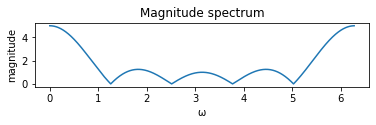

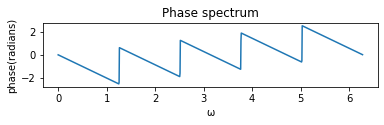

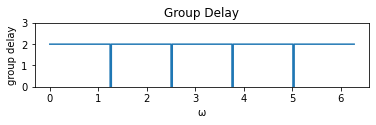

CASE - B


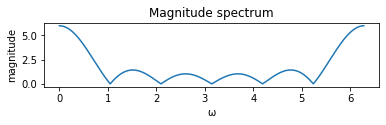

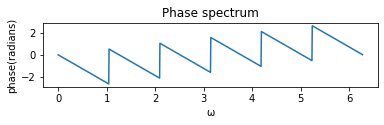

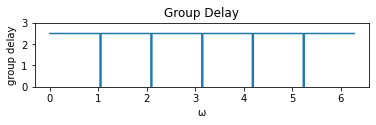

CASE - C


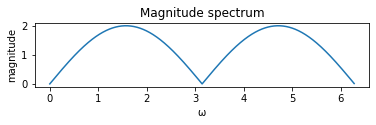

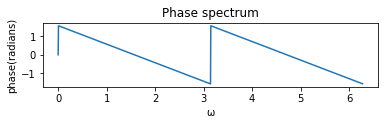

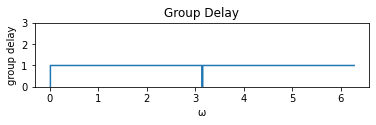

CASE - D


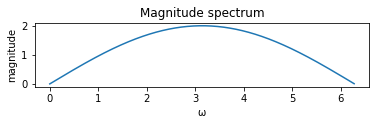

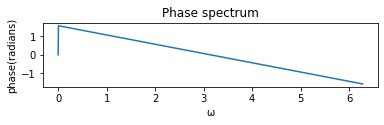

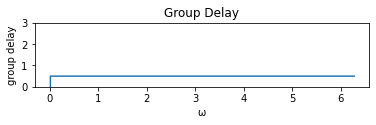

In [5]:
def delta(n):
    if n==0:
        return 1
    else:
        return 0

def unit(n):
    if n>=0:
        return 1
    else:
        return 0
k = 9
#Case (a)
h1 = np.zeros(k)
for i in range(0,k):
    h1[i] = unit(i)-unit(i-5)

#Case (b)
h2 = np.zeros(k)
for i in range(0,k):
    h2[i] = unit(i)-unit(i-6)

#Case (c)
h3 = np.zeros(k)
for i in range(0,k):
    h3[i] = delta(i)-delta(i-2)

#Case (d)
h4 = np.zeros(k)
for i in range(0,k):
    h4[i] = delta(i)-delta(i-1)


n = np.linspace(0,k-1,k)                        #array which stores the values where signal is defined
N = 1000                                        #Number of values of w
w = np.linspace(0,2*np.pi,N,endpoint = False)   #omega in the range 0 ≤ ω < 2π

print("\nCASE - A")
plot_spectrums(DTFT(w,h1,n),w,1)

print("CASE - B")
plot_spectrums(DTFT(w,h2,n),w,1)

print("CASE - C")
plot_spectrums(DTFT(w,h3,n),w,1)

print("CASE - D")
plot_spectrums(DTFT(w,h4,n),w,1)
